In [1]:
import json
import os

import matplotlib.pyplot as plt

def vis_data(year, show_plot = True):

    network_names = ["CLIMATE", "IMMIGRATION", "SOCIAL_SECURITY", "ECONOMIC_POLICY", "EDUCATION", "SDP", "NATIONAL", "LEFT", "CENTER", "FINNS", "GREEN", "PARTIES"]

    randomized_scores_dir = f"./randomized_polarization_scores/{year}/"
    observed_scores_dir = f"./polarization_scores/{year}/"

    network_name = ""
    observed_scores_filename_format = f"{network_name}_{year}_pol.json"
    randomized_scores_filename_format = f"{network_name}_{year}_randomized_pol.json"

    # 'rwc, arwc, ebc, gmck, mblb, mod, ei, extei'

    pol_metrics = ["rwc_metis", "arwc_metis", "ebc_metis", "gmck_metis", "mblb_metis", "mod_metis", "ei_metis", "extei_metis"]
    final_results = dict()

    for net in network_names:

        observed_scores_filename = f"{net}_{year}_pol.json"
        randomized_scores_filename = f"{net}_{year}_randomized_pol.json"

        with open(os.path.join(observed_scores_dir, observed_scores_filename)) as f:
            observed_data = json.load(f)
        
        with open(os.path.join(randomized_scores_dir, randomized_scores_filename)) as f:
            randomized_data = json.load(f)
            shuffled_scores = dict(zip(pol_metrics, randomized_data["onek"]["ave"]))
            
        assert randomized_data["mapping"] == ", ".join([pm.split("_")[0] for pm in pol_metrics]), "Fix the order"

        pol_results = dict()
        for pol in pol_metrics:
            normalized_pol_score = observed_data[pol] - shuffled_scores[pol]
            pol_results[pol] = normalized_pol_score

        final_results[net] = pol_results


    if show_plot:
        markers = ['o', '^', 's', 'd', 'p', '*', 'X', 'v', 'H', '8', '+', '.']

        # create a figure and axes object
        fig, ax = plt.subplots(figsize=(10,6))

        # set the x-axis to be the keys of the dictionary
        #x = list(data_dict.keys())

        # iterate over the values of the dictionary
        for i, topic in enumerate(network_names):
            x = list(final_results[topic].keys())
            y = list(final_results[topic].values())
            # plot the data with a different color for each topic
            ax.scatter(x, y, label=topic, marker=markers[i], s=100, alpha=0.6)

        # set the title and labels of the plot
        ax.set_title(f'{year} Finnish parliamentary election: Polarization of political topics')
        ax.set_xlabel('polarization metric')
        ax.set_ylabel('normalized value')

        # add a legend to the plot
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

        # display the plot
        plt.show()

    return final_results

## Did polarization decrease or increase?


In [2]:
#CORRUPTED: ECONOMIC POLICY 2023, IMMIGRATION 2019, 

In [3]:
scores_2019, scores_2023 = vis_data("2019", show_plot=False), vis_data("2023", show_plot=False)

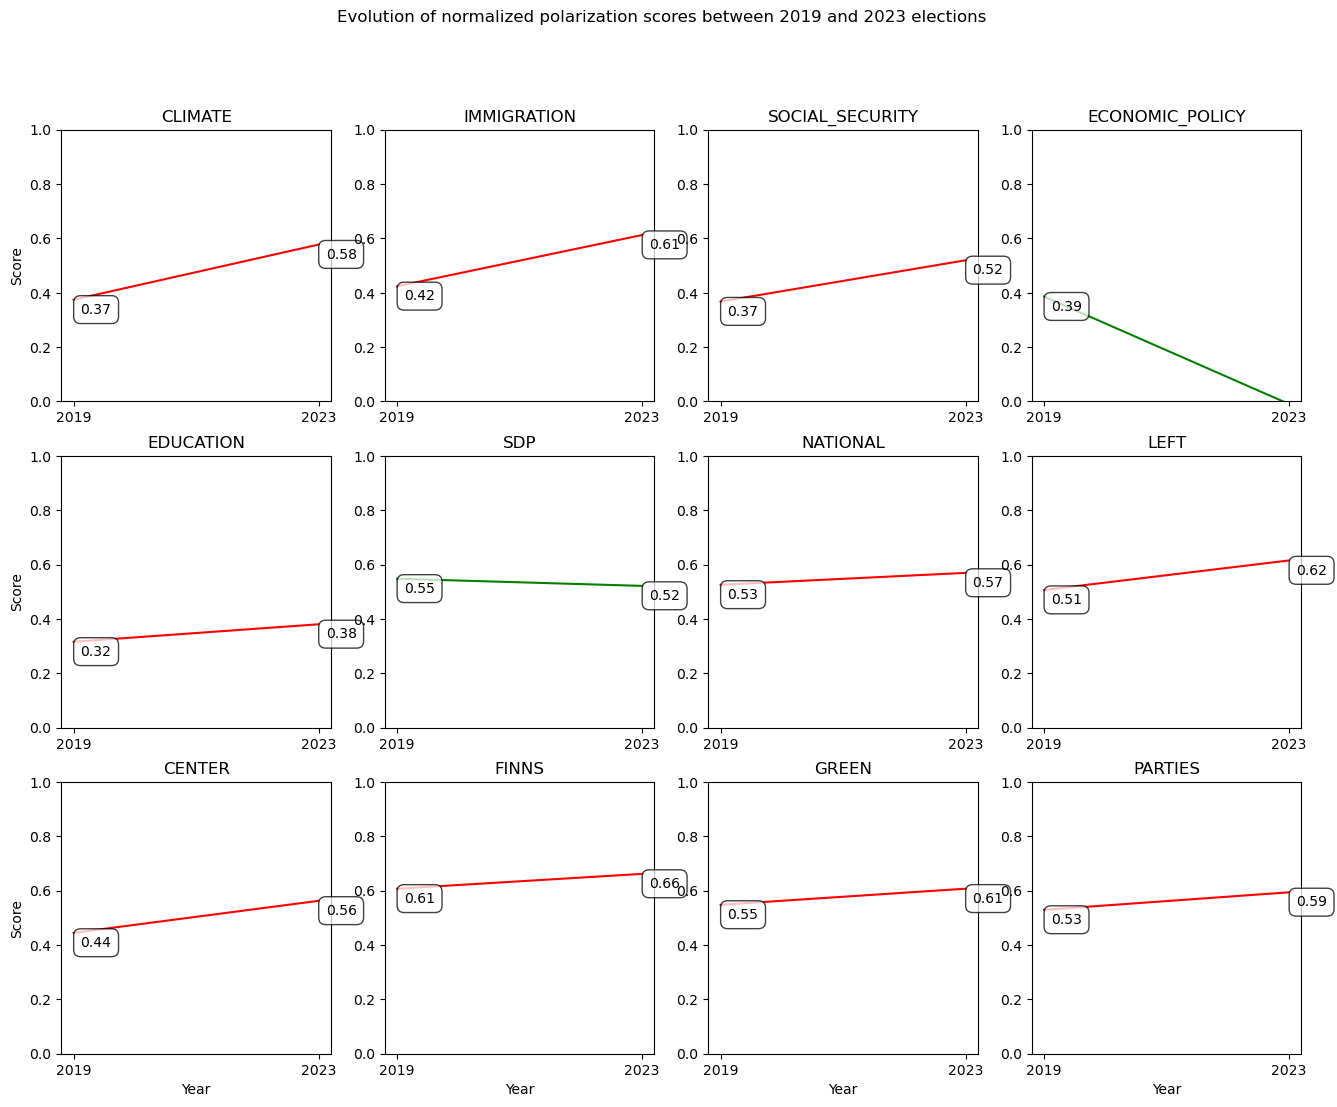

In [9]:
import matplotlib.pyplot as plt

# Create some sample data for 12 topics, each with 8 scores for 2019 and 2023
topics = ["CLIMATE", "IMMIGRATION", "SOCIAL_SECURITY", "ECONOMIC_POLICY", 
          "EDUCATION", "SDP", "NATIONAL", "LEFT", 
          "CENTER", "FINNS", "GREEN", "PARTIES"]

years = ["2019", "2023"]

# Create the figure and subplots
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Plot the data in each subplot
for i in range(3):
    for j in range(4):
        index = i*4 + j

        TOPIC = topics[index]
        RWC_2019 = scores_2019[TOPIC]["arwc_metis"]
        RWC_2023 = scores_2023[TOPIC]["arwc_metis"]
        
        if RWC_2019 < RWC_2023:
            trend_color = "red"
        else:
            trend_color = "green"

        axs[i, j].plot(years, [RWC_2019, RWC_2023], color=trend_color)
        axs[i, j].annotate('{:.2f}'.format(RWC_2019), ("2019", RWC_2019), xytext=(5, -10), textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.75))
        axs[i, j].annotate('{:.2f}'.format(RWC_2023), ("2023", RWC_2023), xytext=(5, -10), textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.75))

        axs[i, j].set_ylim([0, 1])
        axs[i, j].set_title(TOPIC)

# Set the titles and axis labels
fig.suptitle('Evolution of normalized polarization scores between 2019 and 2023 elections')
for ax in axs[:, 0]:
    ax.set_ylabel('Score')
for ax in axs[-1, :]:
    ax.set_xlabel('Year')

# Show the figure
plt.show()


In [5]:
#.28 JA .52